#Transporte de calor

Profesor: Alina Tibaldi  

Alumnos:  
  Franco Bellomo [@fnbellomo](twitter.com/fnbellomo)  
  Lucas Bellomo [@ucaomo](https://twitter.com/ucaomo)  
  
Colaborador: Manuel Otero.

##Modelo Físico
Ecuación de transferencia de calor consta de tres terminos. El primero, de difusion de calor, luego uno de transporte de matéria y por ultimo el calor gerenrado por la radiación de las piedras (producción volumétrica de calor). Notar que $T$ es una función de 4 variable $T=T(x,y,z,t)$.

\begin{equation}\dfrac{\partial T}{\partial t}=\kappa\nabla^{2}T-v\nabla T+\dfrac{A}{\rho C}\end{equation}

\begin{equation} A\left(z\right)=A_{0}e^{-\tfrac{z}{L}} \end{equation}

Donde:
\begin{cases}
Temperatura\qquad & [T]=K\\
Difusion\: t\acute{e}rmica\qquad & [\kappa]=\tfrac{m^{2}}{s}\\
tiempo & [t]=s\\
Densidad & [\rho]=\tfrac{Kg}{m^{3}}\\
Produccion\: vol.\: calor & [A]=\tfrac{W}{m^{3}}\\
Calor\: especifico & [C]=\tfrac{J}{Kg\, K}\\
Velocodad\: del\: medio & [v]=\tfrac{m}{s}\\
Longitud\: caracteristica & [L]=m\\
A0 & [A_{0}]=\tfrac{W}{m^{3}}
\end{cases}

Para nuestros primeros modelos, vamos a suponer que no existe desplazamiento de masas ($v=0$) y vamos a consideras una sola dimención ($z$). Luego, la ecuación nos queda:

\begin{equation}\dfrac{\partial T}{\partial t}=\kappa\dfrac{\partial^{2} T}{\partial z^{2}} + \dfrac{A_{0}e^{-\tfrac{z}{L}}}{\rho C}\end{equation}

##Diferencia Finítas

Imaginemos un gráfico espacio-tiempo, donde en la coordenada verticual tiene el avance el tiempo por ej, de $t_{n}$ a $t_{n+1}$ y donde la coordenada horizontal representa avanze en el espacio: es decir punto consecutivos del espacio discretizado $z_{i-1}$, $z_{i}$ y $z_{i+1}$. Esto nos crea una grilla donde cada punto tiene un indice espacial y otro temperal:

\begin{matrix}
t^{n+1} & \rightarrow & \bullet  && \bullet  && \bullet  \\
t^n & \rightarrow & \bullet  && \bullet  && \bullet  \\
& &  z_{i-1} && z_i && z_{i+1}
\end{matrix}
 
Para la solución numérica de $T(z, t)$, vamos a adoptar la convencion de que todos los subindices van a denotar espacio (el indice $i$ para el gráfico de abajo), miestra que los supraindices van a denotar tiempo (el indice $n$).

\begin{matrix}
& &\bullet & & \bullet & &  \bullet \\
& &T^{n+1}_{i-1} & & T^{n+1}_i & & T^{n+1}_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &T^n_{i-1} & & T^n_i & & T^n_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &T^{n-1}_{i-1} & & T^{n-1}_i & & T^{n-1}_{i+1} \\
\end{matrix}

Es decir, que de la grilla de discretización obtenemos que:
 $$ z_{i} = i\Delta z \qquad t^{n}=n\Delta t $$
 $$ T_{i}^{n} = T(z_{i}, t^{n}) = T(i\Delta z, n\Delta t) $$

Por ahora, solo vamos a considerar una discretización x-espaciada en ambas direcciones.

### Discretizando nuestro modelo

Vamos ahora a discretizar nuestro modelo. De la definición de derivada, olvidandonos del límite, y tomando un $\Delta t$ suficientemente chico nos queda:

\begin{equation}
\dfrac{\partial T}{\partial t}=\dfrac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t}
\end{equation}

Para discretizar las derivadas de 2do orden, consideremos la expanción de Taylor en los puntos $T_{i-1}$ y $T_{i+1}$:

\begin{equation}
T_{i+1}=T_{i}+\Delta x \left.\dfrac{\partial T}{\partial z}\right|_{i}+\dfrac{\Delta z^{2}}{2}\left.\dfrac{\partial^{2}T}{\partial z^{2}}\right|_{i}+\dfrac{\Delta z^{3}}{3}\left.\dfrac{\partial^{3}T}{\partial z^{3}}\right|_{i}+O\left(\Delta z^{4}\right)
\end{equation}

\begin{equation}
T_{i-1}=T_{i}-\Delta z\left.\dfrac{\partial T}{\partial z}\right|_{i}+\dfrac{\Delta z^{2}}{2}\left.\dfrac{\partial^{2}T}{\partial z^{2}}\right|_{i}-\dfrac{\Delta z^{3}}{3}\left.\dfrac{\partial^{3}T}{\partial z^{3}}\right|_{i}+O\left(\Delta z^{4}\right)
\end{equation}

Sumando estos dos terminos obtenemos:

\begin{equation}
T_{i+1}+T_{i-1}=2T_{i}+\Delta z^{2}\left.\dfrac{\partial^{2}T}{\partial z^{2}}\right|_{i}+O\left(\Delta z^{4}\right)
\end{equation}

De donde podemos despejar:

\begin{equation}
\dfrac{T_{i+1}-2T_{i}+T_{i-1}}{\Delta z^{2}}+O\left(\Delta z^{4}\right)=\left.\dfrac{\partial^{2}T}{\partial z^{2}}\right|_{i}
 \end{equation}
 
Ahora, podemos reemplazar la ecuación (3) por la (4) y la (8). Notar que la ecuación (8), todos los terminos estan en un tiempo $i$. Luego, obtenemos que:
 
\begin{equation}
\dfrac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t} = \kappa \dfrac{T_{i+1}-2T_{i}+T_{i-1}}{\Delta z^{2}}+ \dfrac{A_{0}e^{-\tfrac{z}{L}}}{\rho C}
\end{equation}
 
Y despejando, nos queda:
 
\begin{equation}
T_{i}^{n+1}=T_{i}^{n}+\kappa\dfrac{\Delta t}{\Delta z^{2}}\left(T_{i+1}-2T_{i}+T_{i-1}\right)+\Delta t\dfrac{A_{0}e^{-\tfrac{z}{L}}}{\rho C}
\end{equation}
 
###Estabilidad de la ecuación de difusión.
 
Para esta ecuación la condición de estabilidad (CFL) viene dada por:
 
\begin{equation}
\kappa \dfrac{\Delta t}{\Delta z^{2}} \leq \frac{1}{2}
\end{equation}

In [150]:
import numpy as np

import matplotlib.pyplot as plt
#para cambiar el eje y 
from matplotlib import ticker
%matplotlib inline

import time

In [151]:
def solve_dif_ecu(z_total=35000, dz=1750, t_total=3.1536e14, dt=3.1536e8, T0=727, kappa=1e-6, 
                  A0=2e-6, p=5500, C=1260, L=10000, CFL=0.5, amount_plot = 2 ):
    '''Solucion numerica de la ecuacion de difusion de calor
    
    Los numero de puntos en la grilla temporal (nt) son calculados teniendo en cuenta que se 
    cumpla la ecuacion de estabilidad
    
    Parameters
    ----------
    z_total  : integer
        profundidad total. [z] = m.
    dz : float
        Paso en la dimención Z. [dz] = m.
    t_total : float
        tiempo total de calculo. [t_total] = s.
    dt : float
        Paso en el tiempo. De no cumplir con la ecuacion de estavilidad, 
          se lo recalculara. [dt] = s.
    T0 : float
        Temperatura en z. [T0] = K.
    kappa : float
        Difusion termica. [kappa] = m2/s.
    A0 : float
        Volumetric heat production rate. [A0] = W/m3
    p : float
        Densidad. [p] = m3/Kg
    C : float
        Calor especifico. [C] = J/(Kg K)
    L : float
        Longitud caracteristica. [L] = m
    CFL: float
        Valor para la estavilidad de la ecuacion
    amount_plot : int
        Cantidad de plots x-espaciados
        
    Returns
    -------
    u : array
        Array solucion del problema.
    prop: dictionary
        Algunas propiedades del problema (dz, dt, z, t_total, nx, nt)
    '''
    
    #Cálculo de cantidad de puntos en la dimensión Z (nz) como z_total/dz.
    #Chequeo que nz sea entero. De no serlo, recalculo z_total.
    if z_total%dz == 0:
        nz = z_total//dz
    else:
        z_total = z_total + (dz - z_total%dz)
        nz = z_total//dz
    
    #Chequeo que el dt ingresado cumpla con la ecuacion de estabilidad
    #Si no lo cumple, se lo recalcula
    condicion_cfl = dz**2/(2*kappa)
    if dt > condicion_cfl:
        dt = condicion_cfl
    
    #Cálculo de cantidad de puntos en la dimensión temporal (nt) como t_total/dt.
    #Chequeo que nt sea entero. De no serlo, recalculo t_total.
    if t_total%dt == 0:
        nt = int(t_total//dt)
    else:
        t_total = t_total + (dt - t_total%dt)
        nt = int(t_total//dt)
    
    #Inicialización de los array
    #Array de espacio
    z = np.array(range(0, z_total, dz))

    #Array solucion de la temp.
    u = np.zeros(nz)
    un = np.zeros(nz)
    #Condicion inicial
    u[-1] = T0
    
    #Como el ultimo termino del modelo no varia con el timepo
    #lo calculo antes y luego solo lo sumo vectorialmente
    const = (dt*A0)/(p*C)*np.exp(-z/L)
    
    prop = {}
    prop['dz'] = dz
    prop['dt'] = dt
    prop['z'] = z_total
    prop['t_total'] = t_total
    prop['nz'] = nz
    prop['nt'] = nt
    
    u_out = []
    
    
    if amount_plot <= 2:
        amount_plot = 2

    prop['amount_plot'] = amount_plot + 1
        
    plot_time = [int(i) for i in np.linspace(0, nt, amount_plot+1)]

    u_out.append(u.copy())
    
    for i in range(len(plot_time) - 1):
        for k in range(plot_time[i], plot_time[i+1]):
            un = u.copy()
            u[1:-1] = un[1:-1] + kappa*dt/dz**2*(un[2:] - 2*un[1:-1] + un[:-2]) + const[1:-1]
        u_out.append(u.copy())
    
    return u_out, prop

def show_solution(T_out, prop):
    z = np.array(range(0, prop['z'], prop['dz']))

    fig, ax = plt.subplots(figsize=(12, 11))

    for i in range(len(T_out)):
        ax.plot(T_out[i], z, 'o-', label=r'$time=%.2e$' % (prop['dt']*prop['nt'] * i))

    plt.xlabel('$T(K)$', fontsize=25)
    plt.ylabel(r'$z(m)$', fontsize=25)
    plt.title('$Heat\, conductions\; \Delta t=%.2e\; \Delta z=%.2e$' % \
              (prop['dt'], prop['dz']), fontsize=25)
    plt.legend(loc = "best", fontsize=20)

    #Para setear que el eje y sea en notacion cientifica
    ax.set_yticks([i for i in range(0, 40000, 5000)])

    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True) 
    formatter.set_powerlimits((-1,1)) 
    ax.yaxis.set_major_formatter(formatter)

    plt.grid(True)

In [152]:
T_out, prop = solve_dif_ecu(dz=100, amount_plot=10)

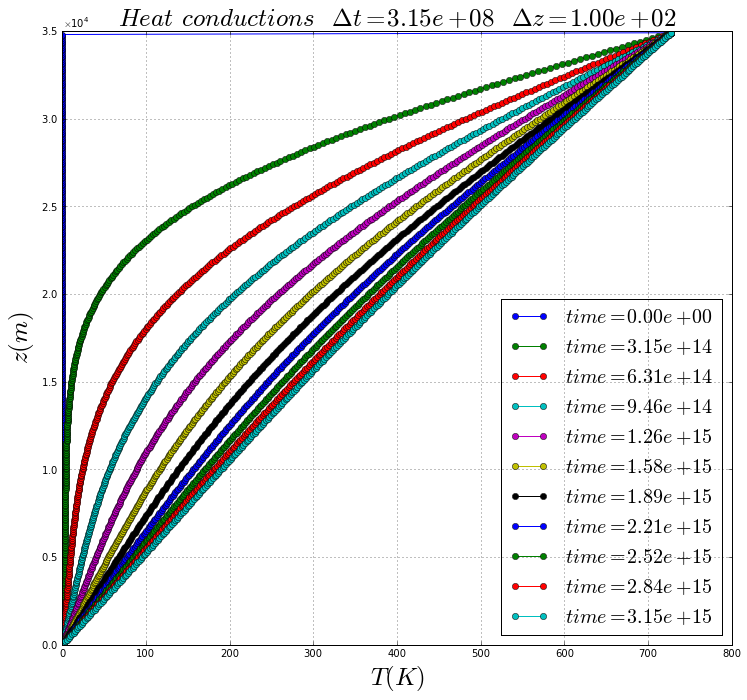

In [153]:
show_solution(T_out, prop)

In [154]:
prop

{'amount_plot': 11,
 'dt': 315360000.0,
 'dz': 100,
 'nt': 1000000,
 'nz': 350,
 't_total': 315360000000000.0,
 'z': 35000}

In [156]:
a = time.time()
u, prop = solve_dif_ecu(dz=100, amount_plot=10)
b = time.time()
print('Time to solve (in seconds):', b-a)

Time to solve (in seconds): 21.550806760787964


######The cell below loads the style of the notebook.

In [1]:
#Este asombroso css es trabajo de @LorenaABarba
from IPython.core.display import HTML
css_file = './style/css/IPython_personal_style.css'
HTML(open(css_file, "r").read())